# Signal Decomposition

- We showcase the concept of signal decomposition 

Manim Community v0.18.1

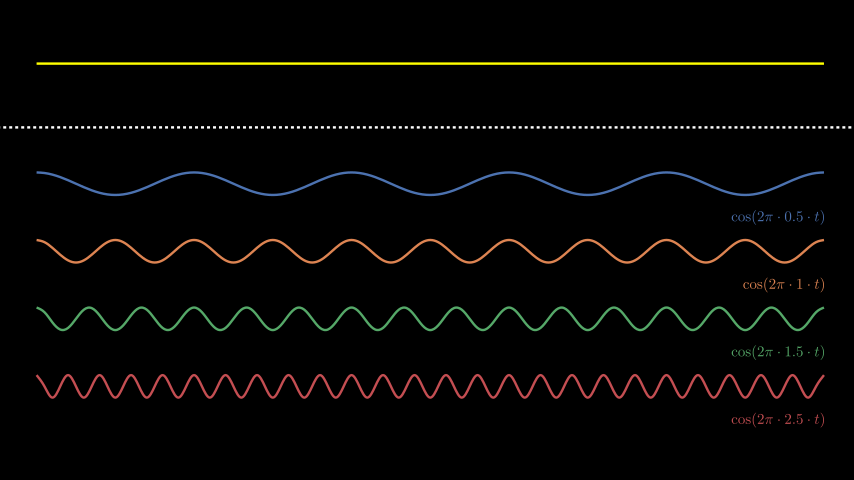

In [8]:
from manim import *
import seaborn as sns

class CosineDecomposition(Scene):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.upper_bias = 2.0
        self.frequencies = [0.5, 1, 1.5, 2.5]
        self.colors = list(
            map(ManimColor.from_rgb, sns.color_palette("deep", len(self.frequencies)))
        )
        self.signals = [lambda x, f=f: np.cos(2 * PI * f * x) / len(self.frequencies) for f in self.frequencies]

    def construct(self):
        wave = self.draw_composite_wave()
        self.decompose_wave(wave)

    def draw_composite_wave(self):
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[-2, 2, 0.5],
            tips=False,
        )
        self.axes = axes
        axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        axes.stretch_to_fit_height(3)
        axes.center()
        axes.to_edge(LEFT)
        
        composite_signal = lambda x: np.sum([s(x) for s in self.signals])
        initial_graph = axes.plot(composite_signal, color=YELLOW)

        # draw composite wave
        self.add(axes)
        self.play(Create(initial_graph), run_time=1.5)
        self.wait(0.5)

        return initial_graph

    def decompose_wave(self, wave: ParametricFunction):
        # move the wave to top of the screen
        self.play(wave.animate.to_edge(UP), FadeOut(self.axes)) # pyright: ignore[reportArgumentType]
        
        # draw a horizontal dotted line
        line = DashedLine(
            start=LEFT * (config.frame_width / 2 + MED_LARGE_BUFF),
            end=RIGHT * (config.frame_width / 2 + MED_LARGE_BUFF),
            color=WHITE,
        ).next_to(wave, DOWN, MED_LARGE_BUFF)
        self.play(FadeIn(line), run_time=0.5)

        # draw the decomposed waves
        components:list[Mobject] = [line]
        
        for i, signal in enumerate(self.signals):
            component = self.axes.plot(signal, color=self.colors[i])
            component.next_to(components[-1], DOWN, MED_SMALL_BUFF + MED_LARGE_BUFF)
            components.append(component)
            text = MathTex(f"\\cos(2\\pi \\cdot {self.frequencies[i]} \\cdot t)", color=self.colors[i], font_size = 24)
            text.next_to(component, DOWN)
            text.to_edge(RIGHT)
            leftover = self.axes.plot(lambda x: np.sum([s(x) for s in self.signals[i+1:]]), color=YELLOW)
            leftover.move_to(wave.get_center())

            self.play(
                ReplacementTransform(wave.copy(), component), 
                Write(text, rate_func=rush_from),
                Transform(wave, leftover),
            )

        self.wait(2)


%manim -v WARNING -ql -s CosineDecomposition